<a href="https://colab.research.google.com/github/Shinhuynry/AI/blob/main/Fuzzy_Control(week6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=4cf4650a8c0616fb6917d13f9d4efd654aadad7f421cecb48e464d7f596f0a6d
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

In [21]:
# Antecedents
Setpoint= ctrl.Antecedent(np.arange(12, 32.1,0.1), 'setpoint')
sensor = ctrl.Antecedent(np.arange(-3, 60.1,0.1), 'sensor')
pwm = ctrl.Consequent(np.arange(0, 255,1), 'pwm')

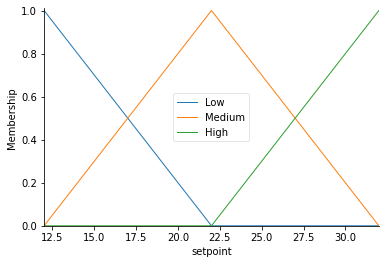

In [22]:
Setpoint['Low'] = fuzz.trimf(Setpoint.universe, [12, 12,22])
Setpoint['Medium'] = fuzz.trimf(Setpoint.universe, [12, 22,32])
Setpoint['High'] = fuzz.trimf(Setpoint.universe, [22, 32,32])
Setpoint.view()

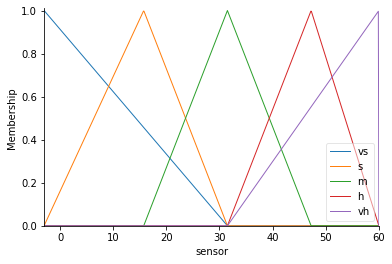

In [23]:
sensor['vs'] = fuzz.trimf(sensor.universe, [-3, -3,31.5])
sensor['s'] = fuzz.trimf(sensor.universe, [-3, 15.75,31.5])
sensor['m'] = fuzz.trimf(sensor.universe, [15.75, 31.5,47.25])
sensor['h'] = fuzz.trimf(sensor.universe, [31.5, 47.25,60])
sensor['vh'] = fuzz.trimf(sensor.universe, [31.5, 60,60])
sensor.view()

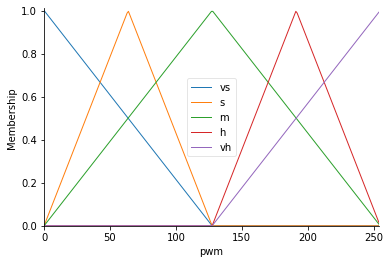

In [24]:
pwm['vs'] = fuzz.trimf(pwm.universe, [0, 0,255/2])
pwm['s'] = fuzz.trimf(pwm.universe, [0, 255/4,255/2])
pwm['m'] = fuzz.trimf(pwm.universe, [0, 255/2,255])
pwm['h'] = fuzz.trimf(pwm.universe, [255/2, 255/2+255/4,255])
pwm['vh'] = fuzz.trimf(pwm.universe, [255/2, 255,255])
pwm.view()

In [40]:
# Rules
rule1=ctrl.Rule(Setpoint['Low']&sensor['vs'], pwm['vh'])
rule2=ctrl.Rule(Setpoint['Low']&sensor['s'], pwm['vh'])
rule3=ctrl.Rule(Setpoint['Low']&sensor['m'], pwm['h'])
rule4=ctrl.Rule(Setpoint['Low']&sensor['h'], pwm['m'])
rule5=ctrl.Rule(Setpoint['Low']&sensor['vh'], pwm['vs'])

rule6=ctrl.Rule(Setpoint['Medium']&sensor['vs'], pwm['vh'])
rule7=ctrl.Rule(Setpoint['Medium']&sensor['s'], pwm['h'])
rule8=ctrl.Rule(Setpoint['Medium']&sensor['m'], pwm['m'])
rule9=ctrl.Rule(Setpoint['Medium']&sensor['h'], pwm['s'])
rule10=ctrl.Rule(Setpoint['Medium']&sensor['vh'], pwm['vs'])

rule11=ctrl.Rule(Setpoint['High']&sensor['vs'], pwm['vh'])
rule12=ctrl.Rule(Setpoint['High']&sensor['s'], pwm['vh'])
rule13=ctrl.Rule(Setpoint['High']&sensor['m'], pwm['h'])
rule14=ctrl.Rule(Setpoint['High']&sensor['h'], pwm['s'])
rule15=ctrl.Rule(Setpoint['High']&sensor['vh'], pwm['vs'])


Gía trị PWM: 110.3036758820045


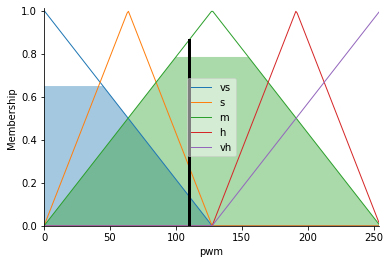

In [41]:
# Simulation
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['setpoint']=3
tipping.input['sensor']=50
tipping.compute()
print('Gía trị PWM:',tipping.output['pwm'])
pwm.view(sim=tipping)

In [44]:
# Antecedents
sensor1= ctrl.Antecedent(np.arange(5, 65.1,0.1), 'sensor1')
sensor2= ctrl.Antecedent(np.arange(5, 65.1,0.1), 'sensor2')
sensor3= ctrl.Antecedent(np.arange(5, 65.1,0.1), 'sensor3')

pwm1= ctrl.Consequent(np.arange(0, 255,1), 'pwm1')
pwm2= ctrl.Consequent(np.arange(0, 255,1), 'pwm2')

In [48]:
sensor1['RG'] = fuzz.trimf(sensor1.universe, [5, 5,20])
sensor1['G'] = fuzz.trimf(sensor1.universe, [5, 20,35])
sensor1['TB'] = fuzz.trimf(sensor1.universe, [20, 35,50])
sensor1['X'] = fuzz.trimf(sensor1.universe, [35, 50,65])
sensor1['TX'] = fuzz.trimf(sensor1.universe, [50, 65,65])
#sensor1.view()

sensor2['RG'] = fuzz.trimf(sensor2.universe, [5, 5,20])
sensor2['G'] = fuzz.trimf(sensor2.universe, [5, 20,35])
sensor2['TB'] = fuzz.trimf(sensor2.universe, [20, 35,50])
sensor2['X'] = fuzz.trimf(sensor2.universe, [35, 50,65])
sensor2['TX'] = fuzz.trimf(sensor2.universe, [50, 65,65])

sensor3['RG'] = fuzz.trimf(sensor3.universe, [5, 5,20])
sensor3['G'] = fuzz.trimf(sensor3.universe, [5, 20,35])
sensor3['TB'] = fuzz.trimf(sensor3.universe, [20, 35,50])
sensor3['X'] = fuzz.trimf(sensor3.universe, [35, 50,65])
sensor3['TX'] = fuzz.trimf(sensor3.universe, [50, 65,65])

pwm1['vs'] = fuzz.trimf(pwm1.universe, [0, 0,255/2])
pwm1['s'] = fuzz.trimf(pwm1.universe, [0, 255/4,255/2])
pwm1['m'] = fuzz.trimf(pwm1.universe, [0, 255/2,255])
pwm1['h'] = fuzz.trimf(pwm1.universe, [255/2, 255/2+255/4,255])
pwm1['vh'] = fuzz.trimf(pwm1.universe, [255/2, 255,255])
#pwm1.view()

pwm2['vs'] = fuzz.trimf(pwm2.universe, [0, 0,255/2])
pwm2['s'] = fuzz.trimf(pwm2.universe, [0, 255/4,255/2])
pwm2['m'] = fuzz.trimf(pwm2.universe, [0, 255/2,255])
pwm2['h'] = fuzz.trimf(pwm2.universe, [255/2, 255/2+255/4,255])
pwm2['vh'] = fuzz.trimf(pwm2.universe, [255/2, 255,255])
#pwm2.view()

In [51]:
# Rules
rule = []
